# **CIS 520: Machine Learning**

## **PyTorch Basics**


- **Content Creators:** Mihir Parmar, Tejas Srivastava, Siyun Hu
- **Content Reviewers:**  Shaozhe Lyu, Michael Zhou, Ani Cowlagi
- **Objective:** In this tutorial, we will cover:

    -  [PyTorch](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html)
    - [Autograd](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py): Automatic Differentiation 

- **Acknowledge:**
    - [Pytorch official tutorials](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html).<br>

    - [CIS 522 Spring '20](https://www.seas.upenn.edu/~cis522/index.html) 

    - CIS 680 Spring 2020 Pytorch Tutorial





 
**Note**: Remember to change Runtime type to GPU Hardware accelerated for leveraging GPU resources.
```
> Runtime > Change runtime type > Hardware accelerator > Select GPU
```

## **Autograding and the PennGrader**


Enter your PennID (numbers not letters!) in the specified section.

### Imports and Setup (Do Not Modify This Section)

In [2]:
%%capture
!pip install penngrader


In [3]:
import random 
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from numpy.linalg import *

import dill
import base64

In [4]:
# For autograder only, do not modify this cell. 
# True for Google Colab, False for autograder
NOTEBOOK = (os.getenv('IS_AUTOGRADER') is None)
if NOTEBOOK:
    print("[INFO, OK] Google Colab.")
else:
    print("[INFO, OK] Autograder.")
    sys.exit()

[INFO, OK] Google Colab.


### Insert PennID here!

In [5]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 57931095 # YOUR PENN-ID GOES HERE AS AN INTEGER#

In [6]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'CIS_5200_202230_HW_PyTorch_Intro_WS', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 57931095

Make sure this correct or we will not be able to store your grade


In [7]:
# A helper function for grading utils
def grader_serialize(obj):        # A helper function
    '''Dill serializes Python object into a UTF-8 string'''
    byte_serialized = dill.dumps(obj, recurse = True)
    return base64.b64encode(byte_serialized).decode("utf-8")


## **What is PyTorch?**


It’s a Python-based scientific computing package targeted at two sets of
audiences:

-  A replacement for NumPy to use the power of GPUs
-  A deep learning platform that provides maximum flexibility
   and speed

At its core, PyTorch provides a few key features:

- A multidimensional **Tensor** object, similar to [numpy](https://numpy.org/) but with GPU acceleration.
- An optimized **autograd** engine for automatically computing derivatives
- A clean, modular API for building and deploying **deep learning models**

You can find more information about PyTorch by following one of the [official tutorials](https://pytorch.org/tutorials/) or by [reading the documentation](https://pytorch.org/docs/1.1.0/).




## **Getting Started**

## Tensors



Tensors are similar to NumPy’s ndarrays.

### Tensor initialization

In [8]:
import torch

Construct a 5x3 matrix, uninitialized:



In [9]:
x = torch.empty(5, 3)
print(x)

tensor([[5.2175e-35, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 7.0374e+22, 0.0000e+00]])


Construct a randomly initialized matrix:



In [10]:
x = torch.rand(5, 3)
print(x)

tensor([[0.7046, 0.4561, 0.3029],
        [0.1597, 0.9120, 0.2677],
        [0.3651, 0.5455, 0.2029],
        [0.1126, 0.5347, 0.0976],
        [0.1275, 0.0554, 0.8796]])


Construct a matrix filled with zeros and of dtype long:



In [11]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Construct a tensor directly from data:



In [12]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


Create a tensor based on an existing tensor. These methods  
will reuse properties of the input tensor, e.g. dtype, unless  
new values are provided by the user.



In [13]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-1.8300, -0.0742, -1.0646],
        [ 0.1174,  0.3832,  0.1276],
        [-0.9881,  1.5877,  0.8806],
        [ 0.5618,  2.7774, -0.3667],
        [ 0.8197,  0.2053, -0.5026]])


Get its size.   
**Note**: torch.Size is a tuple, so it supports all tuple operations.




In [14]:
print(x.size())

torch.Size([5, 3])


### Tensor Operations
There are multiple syntaxes for operations. In the following example, we will take a look at the addition operation.

Addition: Syntax 1



In [15]:
y = torch.rand(5, 3)
print(x + y)

tensor([[-0.8949,  0.6923, -0.9801],
        [ 0.4427,  0.9160,  0.3020],
        [-0.8011,  2.3191,  1.6725],
        [ 0.7383,  3.2011,  0.4783],
        [ 0.8303,  0.4120, -0.1129]])


Addition: Syntax 2



In [16]:
print(torch.add(x, y))

tensor([[-0.8949,  0.6923, -0.9801],
        [ 0.4427,  0.9160,  0.3020],
        [-0.8011,  2.3191,  1.6725],
        [ 0.7383,  3.2011,  0.4783],
        [ 0.8303,  0.4120, -0.1129]])


Addition: Providing an output tensor as argument



In [17]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[-0.8949,  0.6923, -0.9801],
        [ 0.4427,  0.9160,  0.3020],
        [-0.8011,  2.3191,  1.6725],
        [ 0.7383,  3.2011,  0.4783],
        [ 0.8303,  0.4120, -0.1129]])


Addition: In-place



In [18]:
# adds x to y
y.add_(x) # _ at end means the operation mutates tensor y in-place
print(y)

tensor([[-0.8949,  0.6923, -0.9801],
        [ 0.4427,  0.9160,  0.3020],
        [-0.8011,  2.3191,  1.6725],
        [ 0.7383,  3.2011,  0.4783],
        [ 0.8303,  0.4120, -0.1129]])


Besides addition, there are 100+ Tensor operations, including transposing, indexing, slicing,  mathematical operations, linear algebra, random numbers, etc.. There are described [here](http://pytorch.org/docs/torch).

You can use standard NumPy-like indexing with all bells and whistles!



In [19]:
print(x[:, 1])

tensor([-0.0742,  0.3832,  1.5877,  2.7774,  0.2053])


If you want to resize/reshape a tensor, you can use ``torch.view``:



In [20]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


If you have a one element tensor, use ``.item()`` to get the value as a
Python number:



In [21]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([1.0918])
1.0917507410049438




## NumPy Bridge


Converting a Torch Tensor to a NumPy array and vice versa is a breeze.

The Torch Tensor and NumPy array will share their underlying memory locations, and changing one will change the other.






### Converting a Torch Tensor to a NumPy Array

In [22]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [23]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


See how the numpy array changed in value.



In [24]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


###Converting NumPy Array to Torch Tensor
See how changing the np array changed the Torch Tensor automatically:



In [25]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


All the Tensors on the CPU except a CharTensor support conversion to
NumPy and back.





## CUDA Tensors


One of the most important features of PyTorch is that it can use graphics processing units (GPUs) to accelerate its tensor operations.

We can easily check whether PyTorch is configured to use GPUs. Tensors can be moved onto any device using the .to() method.


In [26]:
import torch

if torch.cuda.is_available:
  print('GPU is available for use')
else:
  print('Cannot use GPU.')

GPU is available for use


In [27]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([2.0918], device='cuda:0')
tensor([2.0918], dtype=torch.float64)


If the device is cuda, you can use `.cuda()` to convert tensor onto cuda.


## Autograd: Automatic Differentiation


Central to all neural networks in PyTorch is the ``autograd`` package. To learn more about ``autograd`` and ``Function`` in PyTorch, see [Documentation](http://pytorch.org/docs/autograd).

Let’s first briefly visit this. We will train our first neural network in another Worksheet.


The ``autograd`` package provides automatic differentiation for all operations
on Tensors. It is a define-by-run framework, which means that your backprop is
defined by how your code is run, and that every single iteration can be
different.

Let us see this in more simple terms with some examples.

### Tensor


``torch.Tensor`` is the central class of the package. If you set its attribute
``.requires_grad`` as ``True``, it starts to track all operations on it. When  
you finish your computation you can call ``.backward()`` and have all the
gradients computed automatically. The gradient for this tensor will be accumulated into ``.grad`` attribute.

To stop a tensor from tracking history, you can call ``.detach()`` to detach
it from the computation history, and to prevent future computation from being
tracked.

To prevent tracking history (and use of memory), you can also wrap the code block
in ``with torch.no_grad():``. This can be particularly helpful when evaluating a
model because the model may have trainable parameters with `requires_grad=True`,
but for which we don't need the gradients.

There’s one more class which is very important for autograd implementation - a ``Function``.  

<img src="https://miro.medium.com/max/1536/1*wE1f2i7L8QRw8iuVx5mOpw.png" alt="Function" width="600"/>

``Tensor`` and ``Function`` are interconnected and build up an acyclic
graph, that encodes a complete history of computation. Each tensor has  
a ``.grad_fn`` attribute that references a ``Function`` that has created
the ``Tensor`` (except for Tensors created by the user - their  
``grad_fn is None``).

<img src="https://miro.medium.com/max/1684/1*FDL9Se9otGzz83F3rofQuA.png" alt="Computation Graph" width="500"/>

If you want to compute the derivatives, you can call ``.backward()`` on
a ``Tensor``. If ``Tensor`` is a scalar (i.e. it holds a one element  
data), you don’t need to specify any arguments to ``backward()``,
however if it has more elements, you need to specify a ``gradient``  
argument that is a tensor of matching shape.

<img src="https://miro.medium.com/max/1684/1*EWpoG5KayZSqkWmwM_wMFQ.png" alt="Computation Graph with Gradients" width="500"/>

In [28]:
import torch

Create a tensor and set requires_grad=True to track computation with it:



In [29]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


Do an operation of tensor:



In [30]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


``y`` was created as a result of an operation, so it has a ``grad_fn``.



In [31]:
print(y.grad_fn)

Do more operations on y:



In [32]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


``.requires_grad_( ... )`` changes an existing Tensor's ``requires_grad``
flag in-place. The input flag defaults to ``False`` if not given.



In [33]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


We can visualize the computational graph saved by autograd using torchviz's make_dot()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=798f4dece387271d952b7467593c3abfbf54b37d19f4b2efb8f457e9e67bc908
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


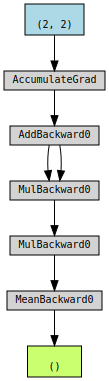

In [34]:
!pip install torchviz
from torchviz import make_dot
make_dot(out) 

### Gradients

Let's do backprop now.
Because ``out`` contains a single scalar, ``out.backward()`` is
equivalent to ``out.backward(torch.tensor(1))``.



In [35]:
out.backward()

Use ```x.grad``` to get the gradient of ```out``` wrt ```x``` and convert it to a numpy array.




In [36]:
x_grad_np = x.grad.numpy() # Get the gradient dout / dx here and convert it to numpy

In [37]:
print(x_grad_np)

[[4.5 4.5]
 [4.5 4.5]]


In [38]:
grader.grade(test_case_id = 'test_x_grad_np', answer = x_grad_np)

Correct! You earned 3.0/3.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


You should have gotten a matrix of ``4.5``. Let’s call the ``out``
*Tensor* “$o$”.  
We have that $o = \frac{1}{4}\sum_i z_i$, $z_i = 3(x_i+2)^2$ and $z_i\bigr\rvert_{x_i=1} = 27$. Therefore, $\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)$, $\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$.



You can do many crazy things with autograd!



In [39]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([  980.1608, -1653.0077,   336.4561], grad_fn=<MulBackward0>)


In [40]:
gradients = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(gradients)

print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


You can also stop autograd from tracking history on Tensors
with ``.requires_grad=True`` by wrapping the code block in
``with torch.no_grad()``. Compute the the Frobenius norm of the quantity ```x**2```, then call backward on it. Compute the same quantity in a ``torch.no_grad()`` environment.


In [44]:
x = torch.ones(2, 2, requires_grad=True)
print(x.grad)

x_squared_frob_grad = torch.norm(x**2, p='fro') # Compute the Frobenius norm of x**2
x_squared_frob_grad.backward()  # Call backward on x_squared_frob_grad

print(x.grad) 

with torch.no_grad():
  x_squared_frob_no_grad =  torch.norm(x**2, p='fro') # Compute the Frobenius norm of x**2 in a torch.no_grad() environment


None
tensor([[1., 1.],
        [1., 1.]])


In [45]:
grader.grade(test_case_id = 'test_torch_no_grad', answer = (x.grad.numpy(), x_squared_frob_no_grad.grad_fn))

Correct! You earned 3.0/3.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Model in PyTorch

PyTorch offers a unified way to define a model: extends the existing Pytorch Module. 

```python
class Model(torch.nn.Module):
    def __init__(self, var):
        super().__init__()
        self.var = var
        
        self.length = xxx
    def count_number(self,var):
      return xxx
    def forward(self, x):
        out = f(x)
        x = self.length
        y = self.count_number(self.var)
        return out
```

 There are two functions to overload:
 1. \_\_init\_\_ constructor function. First we need to initialize torch.nn.Module with super().\_\_init\_\_(). Then we initialize a few variables we need.
 2. forward function. We define the computation model in the forward function, and the gradient computation will be taken care of by the PyTorch.


 PyTorch has built-in support for common neural network layers. Usually we define them in the \_\_init\_\_ function and then call them in the forward function. For example,

 ```python
class Model(torch.nn.Module):
    def __init__(self, var):
        super().__init__()
        self.fc1 = torch.nn.Linear(in_dim, out_dim1)
        self.fc2 = torch.nn.Linear(out_dim1, out_dim2)

    def forward(self, x):
        out = self.fc2(self.fc1(x))
        return out
```

For consecutive layers, we can also use torch.nn.Sequential to chain them together
 ```python
class Model(torch.nn.Module):
    def __init__(self, var):
        super().__init__()
        self.net = torch.Sequential(
            torch.nn.Linear(in_dim, out_dim1),
            torch.nn.Linear(out_dim1, out_dim2)
        )


    def forward(self, x):
        out = self.net(x)
        return out
```

### Loss function

PyTorch also has built-in support for common loss functions. 
1. torch.nn.L1Loss
2. torch.nn.MSELoss
3. torch.nn.CrossEntropyLoss

The typical usage is
```python
# criterion is a function
criterion = torch.nn.XXLoss()
# compute the loss
loss = criterion(pred, target)
# later perform backward pass on loss
loss.backward()
```

### Optimizer

We use gradient descent as the optimization algorithm to minimize the loss function. There are also other advanced optimization algorithms. PyTorch wraps up these algorithms in the optimizer class. 
To create an optimizer, we need to tell it what to optimize: typically we pass in parameters of the model we defined earlier. We can also specify the learning rate. 
 ```python
optimizer = optim.SGD(model.parameters(), lr=0.01)
 ```
 Once we have the optimizer, the update step 
 ```
fc.weight -= dweight * lr
fc.bias -= dbias * lr
 ```
 becomes
 ```python
optimizer.step()
 ```
 By default, the gradient of the optimizer will accumulate over time. So in the training loop, we need to set the gradient to be 0 before we execute the update step:
```python
optimizer.zero_grad()
# compute the gradient
optimizer.step()
 ```

You will get a chance to implement such a model and training loop in later worksheets and homeworks!

## Submitting to the Autograder

First of all, please run your notebook from beginning to end and ensure you are getting all the points from the autograder!

Now go to the File menu and choose "Download .ipynb".  Go to [Gradescope](https://www.gradescope.com/courses/409970) and:

1. From "File" --> Download both .ipynb and .py files
1. Name these files `PyTorch_Intro_WS.ipynb` and `PyTorch_Intro_WS.py` respectively
1. Sign in using your Penn email address (if you are a SEAS student we recommend using the Google login) and ensure  your class is "CIS 5200"
1. Select **Worksheet: PyTorch Intro**
1. Upload both files
1. PLEASE CHECK THE AUTOGRADER OUTPUT TO ENSURE YOUR SUBMISSION IS PROCESSED CORRECTLY!

You should be set! Note that this assignment has 10 autograded points that will show up upon submission. Points are awarded based on a combination of correctness and sufficient effort. 